# LLM

**방대한 텍스트 데이터를 학습해 다음에 올 단어를 확률적으로 예측하는 '초거대 언어모델'**
- 지식의 압축: 인터넷상의 방대한 정보를 신경망 파라미터(가중치) 안에 압축하여 저장한 형태이다.
- 패턴 인식: 단순 암기가 아니라, 언어의 문맥과 패턴을 파악하여 추론(Inference)하는 능력을 갖추고 있다.
- 확률적 생성: 정해진 답을 출력하는 것이 아니라, 문맥상 가장 적절할 확률이 높은 단어를 선택하여 문장을 만들어낸다.



**모델 파라미터에 따른 LLM구분:**

LLM(대규모 언어 모델)은 주로 모델 파라미터(매개변수, parameters)의 개수에 따라 모델의 크기와 성능이 구분된다. 파라미터 수가 많을수록 일반적으로 더 복잡하고 다양한 언어 패턴을 학습할 수 있으며, 성능도 향상되는 경향이 있다.

> **SLM(6,7B ~ 30B)** 은 파인튜닝후 일반화 성능이 떨어지는 경우가 많다. *특히 10B 밑의 모델들이 더 그렇다*

| 구분       | 대략 파라미터 범위              | 특징 요약                                    |
| -------- | ----------------------- | ---------------------------------------- |
| LLM      | 100B ~ 1T+              | 최고 성능, 고비용·고자원.labelyourdata+1​          |
| sLLM     | 대략 13B ~ 30B+            | LLM 구조 유지, 성능·자원 균형.|
| SLM      | 3B ~ 13B (또는 최대 30B 정도) | 단일 GPU/온디바이스 가능, 도메인 특화.​ |
| 초소형/마이크로 | 수천만 ~ 수억                | 임베딩, 분류 등 특정 작업 위주.   |


**open/close-source 여부에 따른 LLM구분**

LLM은 공개 범위와 활용 방식에 따라 크게 **개방형(Open Source, 오픈소스)**과 **폐쇄형(Closed Source, 독점/상용)**으로 구분할 수 있다.

| 구분      | 개방형(Open Source) LLM              | 폐쇄형(Closed Source) LLM                 |
|-----------|--------------------------------------|-------------------------------------------|
| 라이선스   | 오픈소스 라이선스(예: Apache, MIT)    | 벤더(기업) 라이선스, 상용, API 기반         |
| 모델 접근 | 소스 코드, 가중치, 아키텍처 모두 공개 | 내부 구조/가중치 비공개, API로만 접근        |
| 커스터마이징 | 자유롭게 수정·파인튜닝 가능           | 제한적, 벤더가 허용하는 범위 내에서만 가능   |
| 기술 지원 | 커뮤니티 중심, 자발적 기여            | 벤더의 공식 지원, SLA 제공                  |
| 보안/프라이버시 | 자체 서버 배포 가능, 유연한 보안 적용  | 벤더 인프라 의존, 데이터 외부 전송 필요       |
| 비용 구조  | 인프라 직접 부담, 무료 활용 가능       | API 호출별 과금, 구독 등 상용 모델           |
| 대표 예시  | Meta LLaMA, Mistral, GPT-NeoX 등     | OpenAI GPT-3/4, Google Gemini, Anthropic Claude 등 |

- **개방형 LLM**은 연구자와 개발자가 자유롭게 모델을 활용·수정할 수 있어 빠른 혁신과 다양한 커스터마이징이 가능하다. 단, 자체 운영·관리 역량이 필요하다.
- **폐쇄형 LLM**은 벤더가 모델을 소유·운영하며, 사용자는 API 형태로 접근한다. 보안, 신뢰성, 공식 지원이 강점이나, 내부 구조나 가중치 접근이 제한된다.


**LLM 학습 과정:**

**1. 사전 학습 (Pre-training)**

* **학습 내용:** 방대한 텍스트 데이터를 통해 언어의 전반적인 패턴과 지식을 습득.
* **학습 방식:** '다음에 올 단어 예측' 방식 (Self-supervised Learning).
* **결과물:** **Base Model** (문장 이어쓰기에 능함).

**2. 지도 미세 조정 (SFT: Supervised Fine-Tuning)**

* **학습 내용:** 질문-답변(Instruction) 및 대화(Multi-turn) 데이터셋 학습.
* **학습 목표:** 사용자의 지시를 따르고 대화의 문맥을 파악하는 능력 배양.
* **결과물:** **Instruct Model** (챗봇 형태).

**3. 가치 정렬 (Alignment)**

* **학습 목표:** 인간의 가치와 의도(Helpful, Honest, Harmless)에 부합하도록 모델 조율.
* **학습 방법:**
    * **전통적 방식 (RLHF/PPO):** 별도의 보상 모델(Reward Model)을 이용한 강화학습.
    * **최신 트렌드 (DPO/ORPO):** 보상 모델 없이 선호 데이터(Preference Data)를 직접 학습하여 효율성 증대.


* **결과물:** **Aligned Model** (최종 배포용).


## In-context Learning

**In-Context Learning (ICL)**은 거대 언어 모델(LLM)이 **모델의 가중치(Weight) 업데이트 없이**, 프롬프트 내에 주어진 예시나 설명을 문맥(Context)으로 파악하여 즉석에서 새로운 작업을 수행하는 방법론이다.

이는 GPT-3 논문에서 제시된 개념으로, 데이터의 오차를 역전파(Backpropagation)하여 파라미터를 수정하는 기존의 **Fine-tuning**과는 근본적으로 다른 패러다임이다.


* **작동 원리 (Bayesian Inference):** 모델은 방대한 사전 학습을 통해 수많은 태스크의 분포를 학습했다. ICL은 프롬프트를 통해 모델이 알고 있는 지식 공간에서 현재 태스크와 가장 유사한 분포를 **'상기(Recall)'** 시키는 과정으로 해석된다.
* **한계점:**
    * **Context Window 제한:** 입력할 수 있는 예시의 양이 모델의 최대 토큰 길이에 의해 제한된다.
    * **민감성:** 예시의 순서, 라벨링의 정확도, 포맷팅 등 프롬프트 구성의 미세한 차이에 따라 성능 변동이 크다.

**1. 핵심 메커니즘: 학습이 아닌 '패턴 인식'**

ICL의 본질은 모델이 새로운 지식을 '학습'하는 것이 아니라, **이미 학습된 능력(Next Token Prediction)을 활용해 입력된 텍스트의 패턴을 모방**하는 것이다.

* **비유:** 시험공부(Fine-tuning) 없이, 시험지의 '보기 문제'를 보고 푸는 요령을 즉석에서 파악하여 답안을 작성하는 것과 같다.
* **작동 방식:** 모델은 입력된 Context 안에서 **Input  Output**의 규칙성을 발견하고, 그 패턴을 이어가는 방식으로 추론한다.

**2. Shot의 개념 (예시의 양에 따른 분류)**

모델에게 제공하는 예시(Demonstration)의 수에 따라 다음과 같이 구분한다.

* **Zero-shot Learning:** 예시 없이 지시문(Instruction)만 제공한다. 모델의 사전 지식(Pre-trained knowledge)에 전적으로 의존한다.
* **One-shot Learning:** 단 하나의 예시를 보여주어 작업의 성격을 유추하게 한다.
* **Few-shot Learning:** 다수(보통 10~100개)의 예시를 제공하여 패턴을 명확히 한다. 일반적으로 가장 높은 성능을 보인다.

**3. ICL vs. Fine-tuning 비교**

| 구분 | Fine-tuning (전통적 방식) | In-Context Learning (ICL) |
| --- | --- | --- |
| **파라미터 업데이트** | **필수 (가중치 변경)** | **없음 (가중치 동결)** |
| **데이터 요구량** | 수천~수만 건 이상 | 0~수십 건 (프롬프트 내) |
| **적응성** | 태스크마다 모델 재학습 필요 | 프롬프트 수정만으로 즉시 전환 가능 |
| **비용** | 높은 학습 비용 및 시간 소요 | 추론(Inference) 비용만 발생 |


## Emergent Abilities 창발능력

![](https://d.pr/i/gFCzD5+)

**창발 능력(Emergent Abilities)**이란, AI 모델의 크기(파라미터 수, 데이터 양)가 특정 임계치를 넘어서면서 작은 모델에서는 없던 능력이 **갑자기 발현되는 현상**이다. "양이 일정 수준 쌓이면 질적인 변화가 일어난다"는 개념과 유사하다.

* **비선형적 급증:** 성능이 서서히 좋아지는 것이 아니라, 그래프가 꺾이듯 폭발적으로 향상된다.
* **예측 불가능성:** 작은 모델의 결과만으로는 거대 모델에서 어떤 능력이 생길지 예측하기 어렵다.
* **규모 의존:** 주로 수천억 개 이상의 파라미터를 가진 초거대 모델에서 관찰된다.

**대표 예시:**

* **다단계 추론(Chain-of-Thought):** 복잡한 문제를 논리적 단계로 쪼개어 해결하는 능력이다.
* **Few-shot Learning:** 별도의 재학습 없이 예시 몇 개만으로 새로운 작업을 수행하는 능력이다.
* **기타:** 훈련 데이터에 없던 코딩, 사칙연산 등을 수행한다.

## LLM Vendor별 테스트



1. **번역** :

   ```text
   The dominant sequence transduction models are based on complex recurrent or
   convolutional neural networks that include an encoder and a decoder. The best
   performing models also connect the encoder and decoder through an attention
   mechanism. We propose a new simple network architecture, the Transformer,
   based solely on attention mechanisms, dispensing with recurrence and convolutions
   entirely. Experiments on two machine translation tasks show these models to
   be superior in quality while being more parallelizable and requiring significantly
   less time to train. Our model achieves 28.4 BLEU on the WMT 2014 Englishto-German translation task, improving over the existing best results, including
   ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task,
   our model establishes a new single-model state-of-the-art BLEU score of 41.8 after
   training for 3.5 days on eight GPUs, a small fraction of the training costs of the
   best models from the literature. We show that the Transformer generalizes well to
   other tasks by applying it successfully to English constituency parsing both with
   large and limited training data.

   영어로 작성된 과학 저널 논문 초록을 한국어로 번역하되, 전문 용어(예: “photovoltaic efficiency”, “bandgap engineering”)를 정확하게 반영하고, 논문 특유의 딱딱한 문체를 유지하라.
   ```
   - [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385)
   - [Attention Is All You Need](https://arxiv.org/pdf/1706.03762)

2. **코드 생성 (난이도 중상)**

   ```text
   최근 비트코인 가격데이터를 가져와서 시각화 하는 코드를 작성해줘.
   - 설치가 필요한 라이브러리가 있는 경우, 설치코드 역시 작성할 것!
   - 하나의 코드블럭에 모두 작성해야함.
   ```

3. **창의적 글짓기**

   ```text
   “인간과 로봇이 공존하는 미래 도시”를 배경으로,
   200자 내외의 짧은 SF 단편을 한 편 써줘.
   ```

4. **요약**

   ```text
   아래 기술 블로그 글을 3문장 이내로 간결하게 요약해줘:
   “머신러닝 모델의 과적합(overfitting) 문제를 해결하기 위해 정규화(regularization) 기법이 어떻게 사용되는지, L1/L2 페널티의 차이와 장단점을 사례를 들어 설명한다.”
   ```
5. **환각**

   ```text
   현재 대한민국 대통령이 누구야?
   강남에 유명한 성형외과 의사 오지명에 대해 알려줘
   ```
   - knowledge cutoff 이후 이벤트에 대한 질문

### OpenAI ChatGPT-5.2

1.번역
```
다음은 요청한 조건을 반영한 **학술 논문체 한국어 번역**이다.

---

지배적인 시퀀스 변환(sequence transduction) 모델들은 인코더와 디코더를 포함하는 복잡한 순환 신경망(recurrent neural networks) 또는 합성곱 신경망(convolutional neural networks)에 기반한다. 성능이 우수한 모델들은 또한 어텐션 메커니즘(attention mechanism)을 통해 인코더와 디코더를 연결한다. 본 논문에서는 순환 구조와 합성곱을 완전히 배제하고, 오직 어텐션 메커니즘에만 기반한 새로운 단순 신경망 구조인 Transformer를 제안한다.

두 가지 기계 번역 과제에 대한 실험 결과, 제안한 모델은 더 높은 품질을 달성함과 동시에 병렬화가 용이하고 학습 시간이 현저히 짧음을 보였다. 본 모델은 WMT 2014 영어–독일어 번역 과제에서 28.4 BLEU 점수를 기록하여, 앙상블 모델을 포함한 기존 최고 성능 대비 2 BLEU 이상 향상된 결과를 달성하였다. 또한 WMT 2014 영어–프랑스어 번역 과제에서는 8개의 GPU를 사용해 3.5일간 학습한 후 41.8 BLEU 점수를 기록하며, 단일 모델 기준 새로운 최첨단(state-of-the-art) 성능을 확립하였다. 이는 기존 문헌에 보고된 최고 성능 모델들의 학습 비용에 비해 극히 일부에 해당한다.

아울러 본 논문은 대규모 및 제한된 학습 데이터 환경 모두에서 영어 구문 구조 분석(English constituency parsing)에 성공적으로 적용함으로써, Transformer 모델이 다른 과제들에도 일반화 성능을 보임을 입증한다.

```


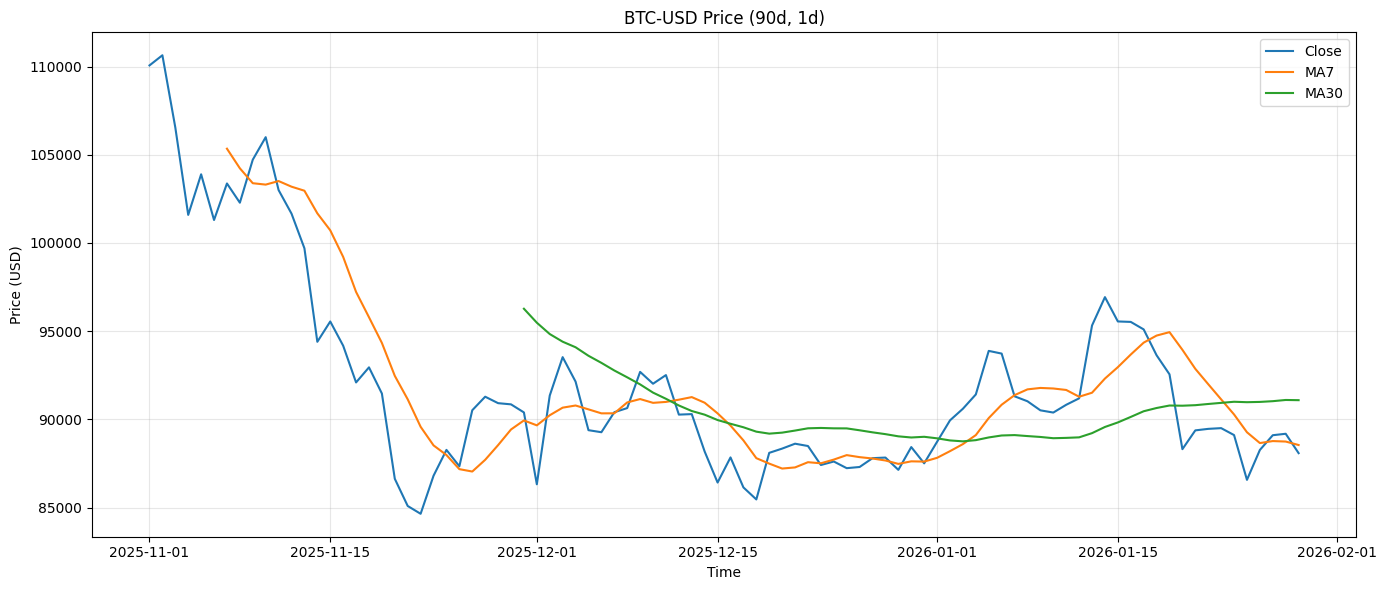

Price        Time          Open          High           Low         Close  \
Ticker                  BTC-USD       BTC-USD       BTC-USD       BTC-USD   
85     2026-01-25  89104.765625  89193.148438  86003.710938  86572.218750   
86     2026-01-26  86566.523438  88743.070312  86429.289062  88267.140625   
87     2026-01-27  88257.476562  89427.125000  87228.921875  89102.570312   
88     2026-01-28  89104.046875  90439.289062  88721.460938  89184.570312   
89     2026-01-29  89163.539062  89163.539062  87677.789062  88085.812500   

Price        Volume           MA7          MA30  
Ticker      BTC-USD                              
85      36124986722  89270.106027  90974.264323  
86      45329286974  88657.755580  90989.763802  
87      38744942267  88770.850446  91031.988281  
88      39807419296  88743.366071  91100.202604  
89      43995721728  88546.703125  91088.725260  


In [6]:
# ✅ 비트코인(BTC-USD) 최근 가격 데이터 가져와서 시각화 (설치 포함, 한 블록)
# 실행 방법:
# - Jupyter/Colab: 그대로 실행
# - 로컬/터미널: `python this_file.py` 로 실행

import sys, subprocess

def pip_install(pkgs):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", *pkgs])

# 필요한 라이브러리 설치
pip_install(["yfinance", "pandas", "matplotlib"])

import yfinance as yf   # 야후파이낸스 데이터 다운로드용
import pandas as pd     # 
import matplotlib.pyplot as plt

# -----------------------------
# 1) 데이터 다운로드 설정
# -----------------------------
symbol = "BTC-USD"

# period / interval 조합 예시:
# - 최근 30일, 1시간봉: period="30d", interval="1h"
# - 최근 90일, 1일봉:  period="90d", interval="1d"
period = "90d"
interval = "1d"

df = yf.download(symbol, period=period, interval=interval, auto_adjust=False, progress=False)


# 예외처리
if df is None or df.empty:
    raise RuntimeError("데이터를 가져오지 못했다. 네트워크/심볼/기간 설정을 확인해라.")

# 컬럼 정리
df = df.reset_index()   # 기존 인덱스(날짜/시간) -> 0~ 새로 달아줌
date_col = "Datetime" if "Datetime" in df.columns else "Date"
df = df[[date_col, "Open", "High", "Low", "Close", "Volume"]].copy()
df.rename(columns={date_col: "Time"}, inplace=True)

# -----------------------------
# 2) 간단한 지표 추가 (이동평균)
# -----------------------------
df["MA7"] = df["Close"].rolling(7).mean()
df["MA30"] = df["Close"].rolling(30).mean()

# -----------------------------
# 3) 시각화 (종가 + 이동평균)
# -----------------------------
plt.figure(figsize=(14, 6))
plt.plot(df["Time"], df["Close"], label="Close")
plt.plot(df["Time"], df["MA7"], label="MA7")
plt.plot(df["Time"], df["MA30"], label="MA30")
plt.title(f"{symbol} Price ({period}, {interval})")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 4) 원하면 CSV 저장
# -----------------------------
# df.to_csv("btc_recent_prices.csv", index=False)
print(df.tail(5))


### Google Gemini3 Pro

1.번역
```
제시된 과학 저널 논문(Attention Is All You Need)의 초록 번역본이다.

---

**초록 (Abstract)**

기존의 주류 시퀀스 변환(sequence transduction) 모델들은 인코더와 디코더를 포함하는 복잡한 순환 신경망(RNN)이나 합성곱 신경망(CNN)에 기반한다. 최고 성능을 보이는 모델들 또한 어텐션 메커니즘(attention mechanism)을 통해 인코더와 디코더를 연결하는 방식을 취한다. 이에 우리는 순환과 합성곱을 완전히 배제하고 오직 어텐션 메커니즘에만 기반한 단순한 새로운 네트워크 아키텍처인 **트랜스포머(Transformer)**를 제안한다.

두 가지 기계 번역 태스크에 대한 실험 결과는 이 모델들이 번역 품질 면에서 우수할 뿐만 아니라, 병렬화(parallelizable)가 더 용이하고 학습 소요 시간이 현저히 적음을 보여준다. 우리 모델은 WMT 2014 영-독 번역 태스크에서 28.4 BLEU를 달성하여, 앙상블(ensemble)을 포함한 기존 최고 결과보다 2 BLEU 이상 향상된 성능을 기록하였다.

또한 WMT 2014 영-불 번역 태스크에서는 문헌상의 기존 최고 모델 대비 학습 비용의 극히 일부에 불과한 8개의 GPU로 3.5일간 학습한 후, 새로운 단일 모델 최고 성능(state-of-the-art)인 41.8 BLEU 점수를 수립하였다. 마지막으로 우리는 대규모 및 제한된 학습 데이터 환경 모두에서 영어 구문 분석(constituency parsing)에 트랜스포머를 성공적으로 적용함으로써, 이 모델이 다른 태스크로도 잘 일반화됨을 입증한다.

---

**추가 제안**: 번역된 내용 중 '어텐션 메커니즘', 'BLEU 스코어', '병렬화' 등 논문의 핵심 개념에 대한 추가적인 기술적 설명이 필요하다면 말씀해 주시기 바란다.
```

데이터를 다운로드 중입니다...


[*********************100%***********************]  1 of 1 completed


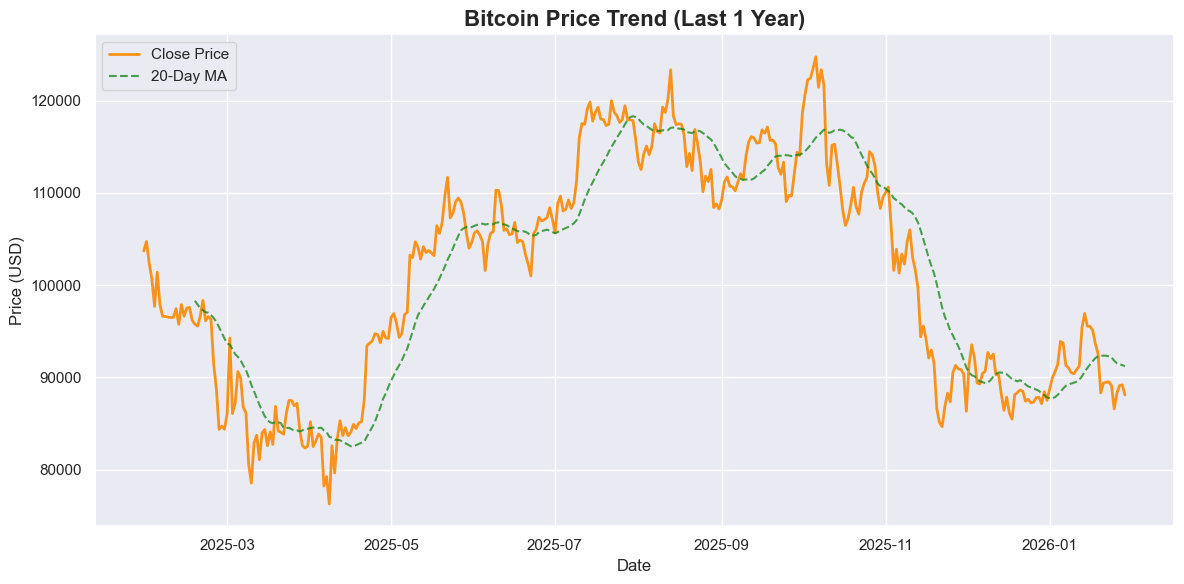

In [7]:
# -----------------------------------------------------------
# [1] 라이브러리 설치
# (Jupyter Notebook/Colab 환경에서는 아래 주석(!)을 해제하고 실행)
# -----------------------------------------------------------
# !pip install yfinance pandas matplotlib seaborn

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_bitcoin_price():
    # 1. 데이터 다운로드 (최근 1년, 비트코인-달러 기준)
    # Ticker: BTC-USD
    print("데이터를 다운로드 중입니다...")
    btc_data = yf.download('BTC-USD', period='1y', interval='1d')

    # 데이터가 비어있는지 확인
    if btc_data.empty:
        print("데이터를 가져오는데 실패했습니다.")
        return

    # 2. 시각화 스타일 설정
    sns.set_theme(style="darkgrid") # 깔끔한 그리드 스타일 적용
    plt.figure(figsize=(12, 6))

    # 3. 차트 그리기
    # 종가(Close) 그래프
    plt.plot(btc_data.index, btc_data['Close'], label='Close Price', color='#f7931a', linewidth=2)

    # (선택사항) 20일 이동평균선 추가 - 추세 확인용
    # yfinance 버전 업데이트로 컬럼이 MultiIndex일 수 있어 단순화 처리
    close_series = btc_data['Close']
    if isinstance(close_series, pd.DataFrame):  # MultiIndex 등에서 'close'가 Dataframe으로 잡히는 경우
        close_series = close_series.iloc[:, 0]  # 첫번째 컬럼값들만 Series로 저장

    ma_20 = close_series.rolling(window=20).mean()
    plt.plot(btc_data.index, ma_20, label='20-Day MA', color='green', linestyle='--', alpha=0.7)

    # 4. 차트 세부 설정
    plt.title('Bitcoin Price Trend (Last 1 Year)', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(loc='upper left')
    plt.tight_layout()

    # 5. 출력
    plt.show()

if __name__ == "__main__":
    visualize_bitcoin_price()

### xAI Grok4

1.번역
```
현재 시퀀스 전처리(sequence transduction)에서 가장 우수한 모델들은 복잡한 **순환 신경망**(recurrent neural networks) 또는 **합성곱 신경망**(convolutional neural networks)을 기반으로 하며, **인코더**(encoder)와 **디코더**(decoder)를 포함한다. 최고 성능을 보이는 모델들은 또한 **어텐션 메커니즘**(attention mechanism)을 통해 인코더와 디코더를 연결한다.

우리는 **어텐션 메커니즘**만을 기반으로 하는 새로운 단순한 네트워크 아키텍처인 **Transformer**를 제안한다. 이 아키텍처는 **순환**(recurrence)과 **합성곱**(convolutions)을 완전히 배제한다. 두 가지 기계 번역(machine translation) 작업에 대한 실험 결과, 이 모델들은 품질 면에서 우수하면서도 **더 높은 병렬 처리 가능성**(more parallelizable)을 가지며, 훈련에 필요한 시간이 현저히 적다는 것을 보여준다.

본 모델은 WMT 2014 영어-독어 번역 작업에서 28.4 BLEU를 달성하였으며, 이는 기존 최고 성능(앙상블 포함)을 2 BLEU 이상 향상시킨 결과이다. WMT 2014 영어-프랑스어 번역 작업에서는 8개의 GPU에서 3.5일간 훈련한 후 단일 모델로 새로운 state-of-the-art BLEU 점수인 41.8을 기록하였으며, 이는 문헌상 최고 모델들의 훈련 비용에 비해 극히 일부에 불과하다.

또한 Transformer가 다른 작업에도 잘 일반화됨을 보여주기 위해, 대규모 및 제한된 훈련 데이터 모두에서 영어 **구성 구문 분석**(English constituency parsing)에 성공적으로 적용하였다.
```

비트코인 데이터 다운로드 중...
데이터 다운로드 완료! 총 91일치 데이터

데이터 미리보기:
Price               Close           High            Low           Open  \
Date                                                                     
2025-10-31  109556.164062  111031.820312  108288.273438  108304.414062   
2025-11-01  110064.015625  110574.898438  109372.953125  109558.625000   
2025-11-02  110639.625000  111167.312500  109523.453125  110064.429688   
2025-11-03  106547.523438  110764.914062  105336.359375  110646.906250   
2025-11-04  101590.523438  107264.882812   98962.062500  106541.421875   

Price             Volume  
Date                      
2025-10-31   60090359560  
2025-11-01   25871668762  
2025-11-02   34284209459  
2025-11-03   72852006359  
2025-11-04  110967184773  

기간: 2025-10-31 ~ 2026-01-29


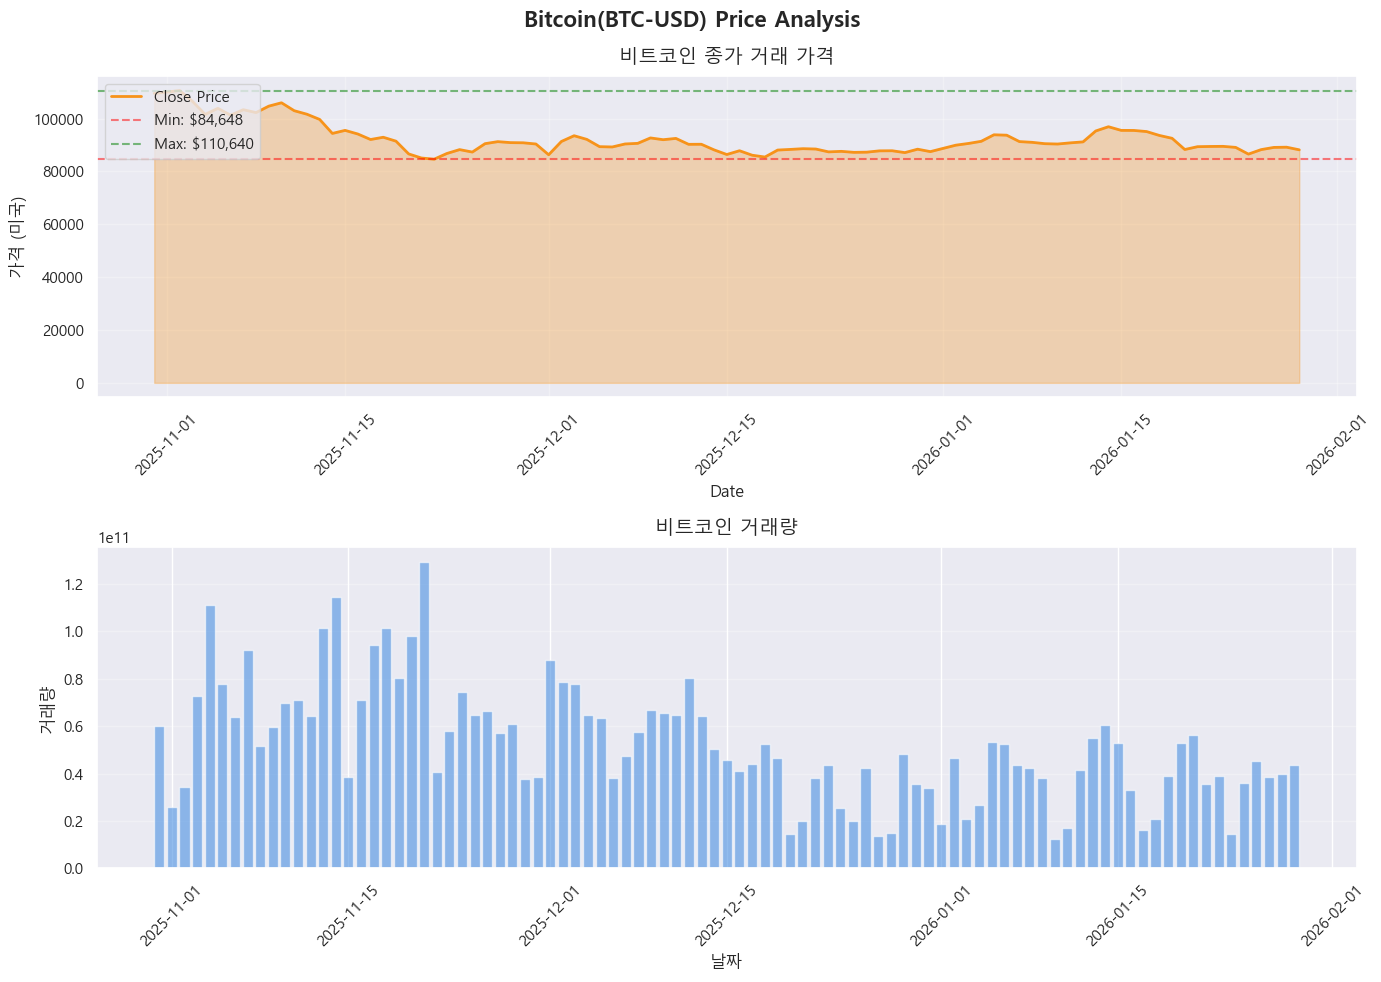


Bitcoin Price Statistics
Current Price: $88,190.40
Highest Price: $110,639.62
Lowest Price: $84,648.36
Average Price: $92,304.28
Price Range: $25,991.27
Period Return: -19.50%


In [12]:
# ============================================
# 1단계: 필요한 라이브러리 설치
# ============================================
import subprocess
import sys

# 필요한 라이브러리 설치
libraries = ['yfinance', 'pandas', 'matplotlib']
for lib in libraries:
    try:
        __import__(lib)
    except ImportError:
        print(f'{lib} 설치 중...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', lib])

# ============================================
# 2단계: 라이브러리 임포트
# ============================================
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta    # 날짜 계산용
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (한글 깨짐 방지)
import matplotlib.font_manager as fm

# 사용 가능한 한글 폰트 찾기
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = ['Malgun Gothic', 'AppleGothic', 'NanumGothic', 'NanumBarunGothic', 'DejaVu Sans']

selected_font = 'DejaVu Sans'  # 기본값
for font in korean_fonts:
    if font in font_list:
        selected_font = font
        break

plt.rcParams['font.family'] = selected_font # matplotlib 기본 폰트 지정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 설정

# ============================================
# 3단계: 비트코인 데이터 다운로드
# ============================================
print("비트코인 데이터 다운로드 중...")

# 비트코인-USD 티커 설정
ticker = "BTC-USD"

# 최근 90일 데이터 가져오기
end_date = datetime.now()
start_date = end_date - timedelta(days=90)

# 데이터 다운로드
btc_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# MultiIndex 컬럼 구조를 단순화 (중요!)
if isinstance(btc_data.columns, pd.MultiIndex):                 # 컬럼이 (Price, Ticker)형태면
    btc_data.columns = btc_data.columns.get_level_values(0)     # 첫 번째 레벨(OHLCV)만 남김

print(f"데이터 다운로드 완료! 총 {len(btc_data)}일치 데이터")
print("\n데이터 미리보기:")
print(btc_data.head())
print(f"\n기간: {btc_data.index[0].date()} ~ {btc_data.index[-1].date()}")  # 시작일자 ~ 마지막일자

# ============================================
# 4단계: 데이터 시각화
# ============================================
# 그래프 크기 설정
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Bitcoin(BTC-USD) Price Analysis', fontsize=16, fontweight='bold')

# 데이터를 1차원 배열로 변환
close_prices = btc_data['Close'].values # 종가
volume_data = btc_data['Volume'].values # 거래량
dates = btc_data.index                  # 날짜

# 첫 번째 그래프: 종가 추이
axes[0].plot(dates, close_prices,
             color='#F7931A', linewidth=2, label='Close Price')
axes[0].fill_between(dates, close_prices,
                      alpha=0.3, color='#F7931A')                       # 종가 아래 영역 채우기
axes[0].set_title('비트코인 종가 거래 가격', fontsize=14, pad=10)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('가격 (미국)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# 가격 범위 표시
min_price = close_prices.min()
max_price = close_prices.max()
axes[0].axhline(y=min_price, color='red', linestyle='--',
                alpha=0.5, label=f'Min: ${min_price:,.0f}')
axes[0].axhline(y=max_price, color='green', linestyle='--',
                alpha=0.5, label=f'Max: ${max_price:,.0f}')
axes[0].legend(loc='upper left')

# 두 번째 그래프: 거래량
axes[1].bar(dates, volume_data,
            color='#4A90E2', alpha=0.6, width=0.8)
axes[1].set_title('비트코인 거래량', fontsize=14, pad=10)
axes[1].set_xlabel('날짜', fontsize=12)
axes[1].set_ylabel('거래량', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

# 날짜 포맷 설정
for ax in axes:
    ax.tick_params(axis='x', rotation=45)   # x축 이름(날짜)를 45도 회전
    
plt.tight_layout()
plt.show()

# ============================================
# 5단계: 통계 정보 출력
# ============================================
print("\n" + "="*50)
print("Bitcoin Price Statistics")
print("="*50)
print(f"Current Price: ${close_prices[-1]:,.2f}")
print(f"Highest Price: ${max_price:,.2f}")
print(f"Lowest Price: ${min_price:,.2f}")
print(f"Average Price: ${close_prices.mean():,.2f}")
print(f"Price Range: ${max_price - min_price:,.2f}")
print(f"Period Return: {((close_prices[-1] / close_prices[0] - 1) * 100):.2f}%")
print("="*50)

## Open-source LLM


이 리더보드는 과거의 단순한 지식 문답형 평가에서 벗어나, **"복잡한 추론(Reasoning)", "엄격한 지시 이행(Instruction Following)", "전문가 수준의 지식(Expert Knowledge)"**을 갖췄는지 검증하는 방향으로 평가지표가 고도화되었음을 보여준다.


**1. IFEval (Instruction Following Evaluation):**

* 모델이 사용자의 '지시 사항'을 얼마나 잘 따르는지 평가하는 지표이다.
* 단순히 답변의 질을 보는 것이 아니라, "JSON 형식으로 답변해라", "500자 이내로 써라", "대문자를 사용하지 마라"와 같은 제약 조건(Constraints)을 모델이 정확히 준수했는지를 객관적으로 채점한다.

**2. BBH (Big Bench Hard):**

* 방대한 과제를 모은 'Big Bench' 데이터셋 중에서, 기존 모델들이 잘 풀지 못했던 난이도 높은 과제들만 추린 데이터셋이다.
* 3단계 이상의 논리적 추론(Chain-of-Thought)이 필요한 문제들로 구성되어 있다. 산술, 상식, 알고리즘적 추론 등 복합적인 사고 능력을 평가한다.

**3. MATH:**

* 고난도 수학 문제를 통해 모델의 문제 해결 능력을 평가하는 지표이다.
* 단순한 사칙연산이 아니라, 고등학교 수학 경시대회 수준의 문제(대수학, 기하학, 미적분 등)를 포함한다. 답만 맞추는 것이 아니라 풀이 과정을 논리적으로 전개해야 정답에 도달할 수 있다.

**4. GPQA (Google-Proof Q&A):**

* 구글 검색으로도 쉽게 답을 찾을 수 없는 매우 어려운 질문들로 구성된 데이터셋이다.
* 생물학, 물리학, 화학 등 각 분야의 박사급 전문가가 직접 출제한 문제들이다. 일반적인 지식 검색 능력보다는 고도로 전문적인 지식과 추론 능력이 있어야 풀 수 있다.

**5. MUSR (Multistep Soft Reasoning):**

* 긴 글(Narrative)을 읽고 그 안에서 여러 단계의 논리적 연결 고리를 파악해야 풀 수 있는 문제이다.
* 1,000단어 이상의 긴 텍스트를 이해하고, 그 안의 인과 관계나 미묘한 정보를 종합하여 추론하는 능력을 테스트한다.

**6. MMLU-PRO (Massive Multitask Language Understanding - Professional):**

* 기존에 널리 쓰이던 MMLU(다중 작업 언어 이해)를 더 어렵게 개선한 버전이다. (이미지에는 `MMLU-...`로 잘려 보이나 문맥상 PRO가 맞다.)
* 법률, 의학, 역사, 컴퓨터 과학 등 57개 주제를 다룬다. 기존 MMLU보다 선택지 개수를 늘려(4지 선다 → 10지 선다 등) 찍어서 맞출 확률을 낮추고, 단순 암기보다는 복잡한 추론을 요구하도록 개선되었다.


## 국내 LLM

http://huggingface.co/spaces/upstage/open-ko-llm-leaderboard **NOT WORKING**

https://leaderboard.dnotitia.com/


[*********************100%***********************]  1 of 1 completed

Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-10-29  110055.304688  113642.726562  109368.718750  112921.328125   
2025-10-30  108305.546875  111612.351562  106376.687500  110059.195312   
2025-10-31  109556.164062  111031.820312  108288.273438  108304.414062   
2025-11-01  110064.015625  110574.898438  109372.953125  109558.625000   
2025-11-02  110639.625000  111167.312500  109523.453125  110064.429688   

Price            Volume  
Ticker          BTC-USD  
Date                     
2025-10-29  62192043469  
2025-10-30  69673964814  
2025-10-31  60090359560  
2025-11-01  25871668762  
2025-11-02  34284209459  
MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Pric

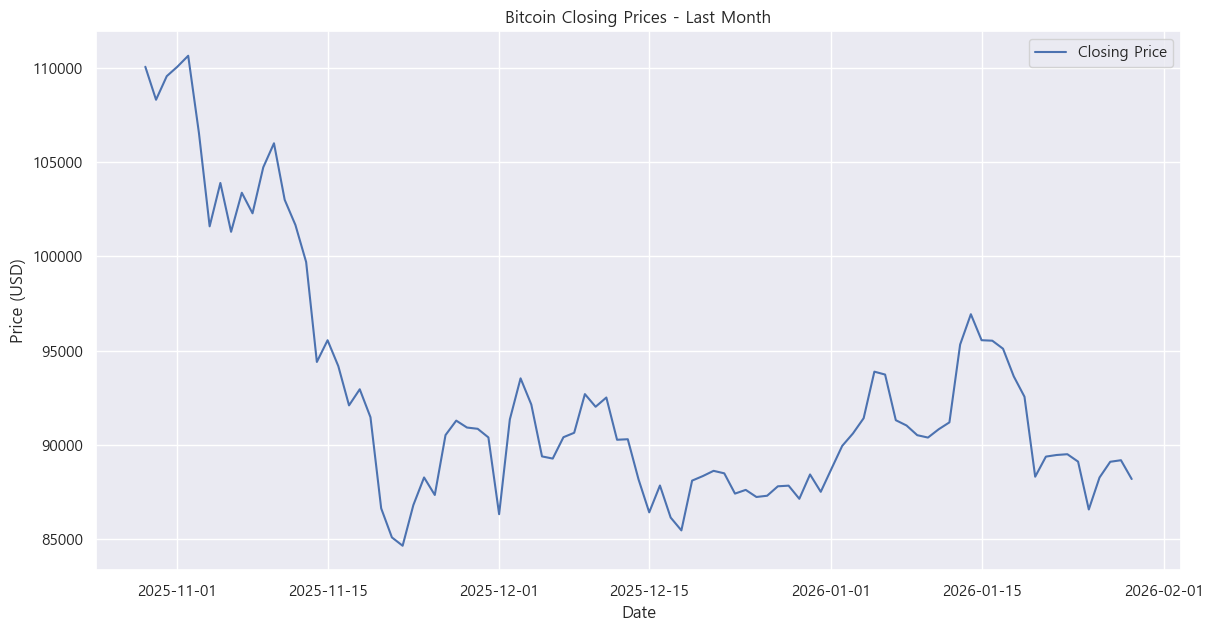

In [14]:
# 필요한 라이브러리 설치
#!pip install pandas matplotlib yfinance

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 비트코인 가격 데이터 다운로드
btc_data = yf.download(tickers='BTC-USD', period='3mo', interval='1d')

# 데이터 확인
print(btc_data.head())

# 데이터프레임의 열 이름 확인
print(btc_data.columns)

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices - Last Month')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## LLM의 평가지표

[LLM 평가를 위한 다양한 지표와 데이터셋 종합 정리 Perplexity Page](https://www.perplexity.ai/page/llm-pyeonggareul-wihan-dayangh-aIEYnUEbRl.TIJoAxO6sBg)

### lmarena
https://lmarena.ai/


**LMArena.ai**는 대형 언어 모델(LLM)의 성능을 실제 사용자 참여 기반으로 평가·비교하는 개방형 벤치마킹 플랫폼이다. UC Berkeley 연구진이 주도하여 개발하였으며, 누구나 쉽게 최신 AI 모델을 직접 시험하고, 비교하고, 평가에 참여할 수 있도록 설계되어 있다.


**핵심 특징**

- **커뮤니티 기반 실시간 평가**  
  사용자가 직접 입력한 프롬프트(질문)에 대해, 무작위로 선정된 두 개의 AI 모델이 응답을 생성한다. 사용자는 두 응답을 비교해 더 우수하다고 생각하는 쪽에 투표한다. 이 과정은 블라인드(익명)로 진행되어 편향을 최소화한다. 투표가 끝나면 어떤 모델이었는지 공개된다.

- **Elo 레이팅 시스템**  
  체스에서 사용하는 Elo 점수 시스템을 도입하여, 각 모델의 상대적 실력을 동적으로 산출한다. 강한 상대를 이기면 점수가 크게 오르고, 약한 상대에게 지면 점수가 크게 깎인다. 모든 모델의 점수와 순위는 리더보드에서 실시간으로 확인할 수 있다.

- **공정성과 투명성**  
  플랫폼의 평가 시스템, 코드, 데이터 일부는 오픈소스로 공개되어 있다. 누구나 모델을 제출하거나, 평가에 참여할 수 있다. 평가 데이터의 일부(최대 20%)는 연구와 커뮤니티 공유를 위해 공개된다.

- **다양한 모델 비교**  
  GPT-4, Claude, Llama, Mistral 등 상용·오픈소스 모델을 모두 포함해 400개 이상 모델이 등록되어 있다. 사전 공개(pre-release) 모델도 실험적으로 평가에 참여한다.


**플랫폼의 작동 방식**

1. 사용자가 프롬프트(질문)를 입력한다.
2. 두 개의 익명 AI 모델이 각각 답변을 생성한다.
3. 사용자는 두 답변을 비교해 더 나은 쪽에 투표한다(동점도 가능).
4. 투표 후 모델의 정체가 공개된다.
5. 결과는 Elo 시스템에 따라 점수에 반영되고, 리더보드에 실시간으로 반영된다.


**플랫폼의 목적과 의의**

- 기존의 정적인 벤치마크(고정된 데이터셋, 자동화 지표) 한계를 극복하고, 실제 사용자 경험과 선호도를 반영한 동적 평가를 지향한다.
- 창의성, 유용성, 맥락 이해력 등 자동화 지표로는 잡기 힘든 요소까지 평가할 수 있다.
- 누구나 심사위원이 되어 AI 발전에 기여할 수 있는 ‘공정하고 투명한 AI 평가 생태계’를 추구한다.


